In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:04<00:00, 247MB/s]
100% 1.06G/1.06G [00:04<00:00, 250MB/s]


In [ ]:
# to unzip the downloaded data
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow,keras

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
model_resnet = ResNet50(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [ ]:
model_vgg = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [ ]:
model_resnet.summary()

In [ ]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from keras import Sequential
from keras.layers import Dense,Flatten

In [ ]:
model=Sequential()
model.add(model_vgg)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               4194816   
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18910017 (72.14 MB)
Trainable params: 4195329 (16.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model_vgg.trainable=False

In [ ]:
train_data=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    class_names=["cats","dogs"],
    # by giving class_names i know that if output is zero
    #then it means prediction is cat and output is one than output is dog
    image_size=(150, 150))
test_data=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def normalize(image,label):
  return image/255,label

In [ ]:
train_data=train_data.map(normalize)
test_data=test_data.map(normalize)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
#with trainable as false
#history=model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 69s 88ms/step - loss: 0.2852 - accuracy: 0.8817 - val_loss: 0.2224 - val_accuracy: 0.9076
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1896 - accuracy: 0.9222 - val_loss: 0.2227 - val_accuracy: 0.9038
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1618 - accuracy: 0.9355 - val_loss: 0.2270 - val_accuracy: 0.9010
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1332 - accuracy: 0.9464 - val_loss: 0.2199 - val_accuracy: 0.9128
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1006 - accuracy: 0.9602 - val_loss: 0.2472 - val_accuracy: 0.9078
Epoch 6/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0776 - accuracy: 0.9689 - val_loss: 0.3851 - val_accuracy: 0.8836
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0617 - accuracy: 0.9768 - val_loss: 0.3229 - val_accu

In [66]:
history=model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 66s 102ms/step - loss: 0.2733 - accuracy: 0.8869 - val_loss: 0.2070 - val_accuracy: 0.9144
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1931 - accuracy: 0.9183 - val_loss: 0.2256 - val_accuracy: 0.9046
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1562 - accuracy: 0.9361 - val_loss: 0.1967 - val_accuracy: 0.9176
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1278 - accuracy: 0.9466 - val_loss: 0.2418 - val_accuracy: 0.9006
Epoch 5/10
625/625 [==============================] - 58s 93ms/step - loss: 0.0979 - accuracy: 0.9617 - val_loss: 0.2408 - val_accuracy: 0.9076
Epoch 6/10
625/625 [==============================] - 57s 90ms/step - loss: 0.0733 - accuracy: 0.9720 - val_loss: 0.2533 - val_accuracy: 0.9152
Epoch 7/10
625/625 [==============================] - 58s 93ms/step - loss: 0.0572 - accuracy: 0.9791 - val_loss: 0.3662 - val_accura

In [ ]:
for layer in model_vgg.layers:
  if 'block5' in str(layer.name).lower():
    layer.trainable=True
    #break

In [67]:
for layer in model_vgg.layers:
  print(layer.name,layer.trainable)
    #layer.trainable=True

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


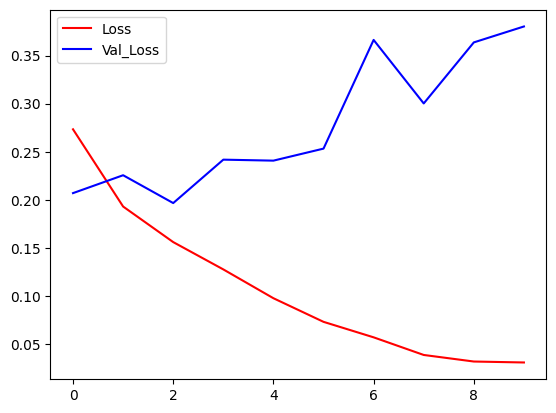

In [68]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='Loss')
plt.plot(history.history['val_loss'],color='blue',label='Val_Loss')
plt.legend()
plt.show()

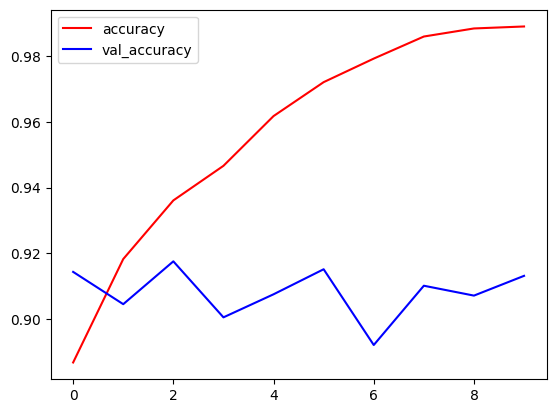

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='val_accuracy')
plt.legend()
plt.show()